In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE # oversample

from sklearn.utils import resample # undersample
from imblearn.under_sampling import RandomUnderSampler # undersample
from imblearn.under_sampling import ClusterCentroids # undersample

# Oversample

In [2]:
df= pd.read_csv('hacide_train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   cls         1000 non-null   int64  
 2   x1          1000 non-null   float64
 3   x2          1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [4]:
df.cls.value_counts()

0    980
1     20
Name: cls, dtype: int64

<AxesSubplot:xlabel='x1', ylabel='x2'>

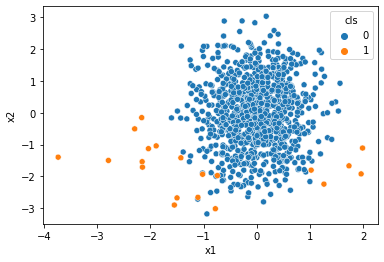

In [5]:
# sample size is small >> try over sampling
sns.scatterplot(data=df,x='x1',y='x2',hue='cls')

In [7]:
x= df[['x1','x2']]
y= df.cls

In [8]:
x_new,y_new= SMOTE(random_state=0).fit_resample(x,y)

In [9]:
x_new

,x1,x2
0,0.200798,0.678038
1,0.016620,1.576558
2,0.228725,-0.559534
3,0.126379,-0.093814
4,0.600821,-0.298395
...,...,...
1955,-2.232242,-0.334275
1956,-1.518209,-2.757232
1957,1.286534,-1.752162
1958,-1.130383,-1.790801


In [10]:
df_new= pd.DataFrame(x_new,columns=['x1','x2'])
df_new['target']=y_new

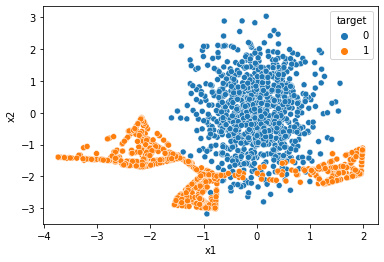

In [12]:
sns.scatterplot(data=df_new,x='x1',y='x2',hue='target');

In [13]:
df_new.target.value_counts()

0    980
1    980
Name: target, dtype: int64

# Undersample

***Random Under Sample***

In [15]:
x.head()

,x1,x2
0,0.200798,0.678038
1,0.016620,1.576558
2,0.228725,-0.559534
3,0.126379,-0.093814
4,0.600821,-0.298395


In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: cls, dtype: int64

In [21]:
rs= RandomUnderSampler()

In [22]:
x_rs,y_rs= rs.fit_resample(x,y)

In [23]:
x_rs['target']= y_rs
x_rs.head()

,x1,x2,target
0,-1.097885,-0.197603,0
1,1.329133,0.000071,0
2,0.244311,0.411479,0
3,-0.088920,0.447572,0
4,0.754319,-0.369425,0


In [24]:
x_rs.target.value_counts()

0    20
1    20
Name: target, dtype: int64

<AxesSubplot:xlabel='x1', ylabel='x2'>

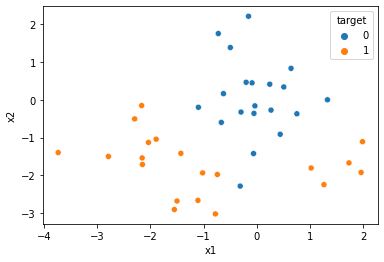

In [26]:
sns.scatterplot(data=x_rs,x='x1',y='x2',hue="target")

***Resample***

In [27]:
df.head()

,Unnamed: 0,cls,x1,x2
0,1,0,0.200798,0.678038
1,2,0,0.016620,1.576558
2,3,0,0.228725,-0.559534
3,4,0,0.126379,-0.093814
4,5,0,0.600821,-0.298395


In [35]:
df_major= df[df.cls==0]
df_major.shape

(980, 4)

In [36]:
df_minor= df[df.cls==1]
df_minor.shape

(20, 4)

In [38]:
df_undersample= resample(df_major,
                         replace= False,
                         n_samples= 20,
                         random_state=0)
df_undersample.shape

(20, 4)

In [39]:
df_new=pd.concat([df_undersample,df_minor])
df_new.shape

(40, 4)

In [40]:
df_new.head()

,Unnamed: 0,cls,x1,x2
440,441,0,0.143792,0.312365
412,413,0,-0.803509,0.539394
331,332,0,-0.634353,0.804421
625,626,0,-0.355619,-1.584057
578,579,0,0.638997,1.404504


<AxesSubplot:xlabel='x1', ylabel='x2'>

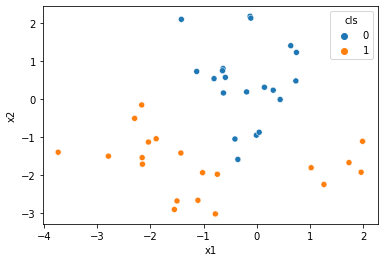

In [41]:
sns.scatterplot(data=df_new,x='x1',y='x2',hue="cls")

***ClusterCentroid***

In [43]:
x.head()

,x1,x2
0,0.200798,0.678038
1,0.016620,1.576558
2,0.228725,-0.559534
3,0.126379,-0.093814
4,0.600821,-0.298395


In [44]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: cls, dtype: int64

In [45]:
cc= ClusterCentroids(random_state=0)

In [46]:
x_new,y_new= cc.fit_resample(x,y)

In [56]:
df_cc= pd.concat([x_new,y_new],axis=1)

In [59]:
df_cc.head()

,x1,x2,cls
0,-0.027066,-0.796390,0
1,0.329852,0.929428,0
2,-0.318738,0.848427,0
3,0.285907,-2.127073,0
4,-0.062216,1.588956,0


<AxesSubplot:xlabel='x1', ylabel='x2'>

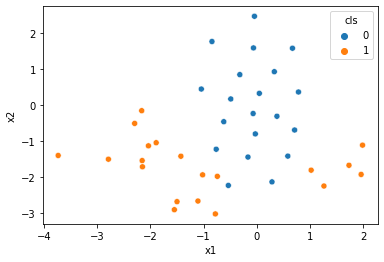

In [60]:
sns.scatterplot(data=df_cc,x='x1',y='x2',hue="cls")